In [135]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

In [110]:
credits_df = pd.read_csv('../content/cleaned_credits.csv')

In [111]:
titles_df = pd.read_csv('../content/cleaned_movie_db.csv')

In [112]:
merged_df = credits_df.merge(titles_df, on= "id")
merged_df

,index_x,person_id,id,name,role,index_y,title,movie,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,0,3748,tm84618,Robert De Niro,ACTOR,1,Taxi Driver,MOVIE,1976,R,113,"[''crime'', ''drama'']",['US'],tt0075314,8.3,795222.0,27.612,8.2
1,1,14658,tm84618,Jodie Foster,ACTOR,1,Taxi Driver,MOVIE,1976,R,113,"[''crime'', ''drama'']",['US'],tt0075314,8.3,795222.0,27.612,8.2
2,2,7064,tm84618,Albert Brooks,ACTOR,1,Taxi Driver,MOVIE,1976,R,113,"[''crime'', ''drama'']",['US'],tt0075314,8.3,795222.0,27.612,8.2
3,3,3739,tm84618,Harvey Keitel,ACTOR,1,Taxi Driver,MOVIE,1976,R,113,"[''crime'', ''drama'']",['US'],tt0075314,8.3,795222.0,27.612,8.2
4,4,48933,tm84618,Cybill Shepherd,ACTOR,1,Taxi Driver,MOVIE,1976,R,113,"[''crime'', ''drama'']",['US'],tt0075314,8.3,795222.0,27.612,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34128,76497,1185475,tm1019084,Antonia Gentry,ACTOR,5720,Ginny & Georgia - The Afterparty,MOVIE,2021,R,35,[],"[''US'', ''CA'']",NaN,NaN,NaN,7.610,7.8
34129,76498,57076,tm1019084,Jennifer Robertson,ACTOR,5720,Ginny & Georgia - The Afterparty,MOVIE,2021,R,35,[],"[''US'', ''CA'']",NaN,NaN,NaN,7.610,7.8
34130,76499,85368,tm1019084,Sara Waisglass,ACTOR,5720,Ginny & Georgia - The Afterparty,MOVIE,2021,R,35,[],"[''US'', ''CA'']",NaN,NaN,NaN,7.610,7.8
34131,77011,2040919,tm1094060,Robin Wiltshire,ACTOR,5777,My Heroes Were Cowboys,MOVIE,2021,PG,23,['documentation'],['US'],tt15084326,NaN,NaN,3.688,7.7


In [113]:
mdf= merged_df.drop(columns=["index_x","index_y", "name", "role", "person_id", "movie", "release_year", "age_certification", "genres", "production_countries"])

In [114]:
mdf

,id,title,runtime,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm84618,Taxi Driver,113,tt0075314,8.3,795222.0,27.612,8.2
1,tm84618,Taxi Driver,113,tt0075314,8.3,795222.0,27.612,8.2
2,tm84618,Taxi Driver,113,tt0075314,8.3,795222.0,27.612,8.2
3,tm84618,Taxi Driver,113,tt0075314,8.3,795222.0,27.612,8.2
4,tm84618,Taxi Driver,113,tt0075314,8.3,795222.0,27.612,8.2
...,...,...,...,...,...,...,...,...
34128,tm1019084,Ginny & Georgia - The Afterparty,35,NaN,NaN,NaN,7.610,7.8
34129,tm1019084,Ginny & Georgia - The Afterparty,35,NaN,NaN,NaN,7.610,7.8
34130,tm1019084,Ginny & Georgia - The Afterparty,35,NaN,NaN,NaN,7.610,7.8
34131,tm1094060,My Heroes Were Cowboys,23,tt15084326,NaN,NaN,3.688,7.7


In [115]:
cleaned_df = mdf.dropna()

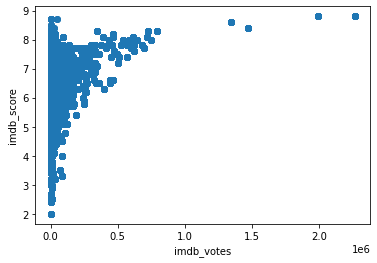

In [116]:
plt.scatter(cleaned_df['imdb_votes'], cleaned_df['imdb_score'])
plt.xlabel('imdb_votes')
plt.ylabel("imdb_score")
plt.show()

In [126]:
X = cleaned_df.drop(columns="imdb_score")
X = pd.get_dummies(cleaned_df, columns=["id", "title", "imdb_id"])
y = cleaned_df["imdb_score"]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,
    y, random_state=1, stratify=y)
X_train.shape

(24468, 4122)

In [134]:
X.describe()

,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,id_tm1001108,id_tm1001267,id_tm1002815,id_tm1003034,id_tm1003261,...,imdb_id_tt9794630,imdb_id_tt9815714,imdb_id_tt9817258,imdb_id_tt9856280,imdb_id_tt9860752,imdb_id_tt9861504,imdb_id_tt9866072,imdb_id_tt9887580,imdb_id_tt9893250,imdb_id_tt9898858
count,32625.000000,32625.000000,3.262500e+04,32625.000000,32625.000000,32625.000000,32625.000000,32625.00000,32625.000000,32625.000000,...,32625.000000,32625.00000,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000
mean,106.238866,6.363215,1.122575e+05,29.803480,6.525588,0.001471,0.000215,0.00049,0.000889,0.000061,...,0.000644,0.00049,0.000061,0.000705,0.000552,0.000061,0.001195,0.000337,0.000613,0.000613
std,23.515243,1.029581,2.121714e+05,45.532805,0.823876,0.038329,0.014646,0.02214,0.029801,0.007829,...,0.025363,0.02214,0.007829,0.026543,0.023483,0.007829,0.034554,0.018359,0.024752,0.024752
min,13.000000,2.000000,6.000000e+00,0.600000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.000000,5.700000,7.566000e+03,10.970000,6.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,103.000000,6.500000,4.157100e+04,16.841000,6.600000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,119.000000,7.100000,1.250980e+05,31.774000,7.100000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,229.000000,8.800000,2.268288e+06,919.599000,8.500000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [136]:
X_scaler = skl.preprocessing.StandardScaler()

X_scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [139]:
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [147]:
nn_model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])